In [2]:
import networkx as nx
import numpy as np


with open('facebook_combined.txt', 'r') as file:
    lines = file.readlines()


graph= nx.Graph()
for line in lines:
    nodes = line.strip().split()

    graph.add_nodes_from(nodes)

    for i in range(1, len(nodes)):
        graph.add_edge(nodes[0], nodes[i])

adjacency_matrix = nx.to_numpy_matrix(graph)

adjacency_matrix = np.array(adjacency_matrix)

print(adjacency_matrix)

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


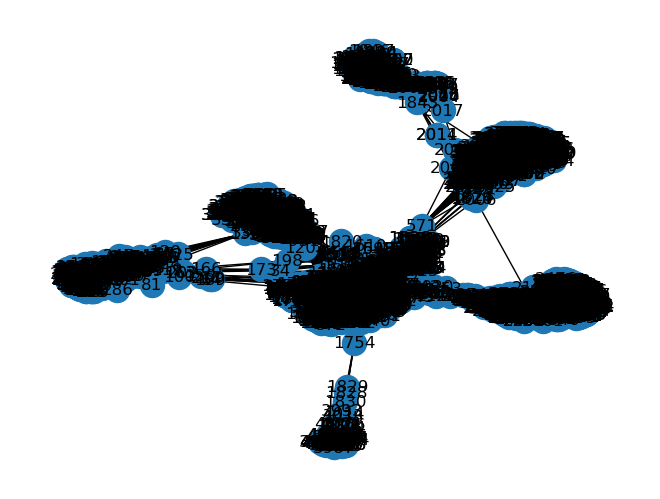

In [3]:
import networkx as nx
G = nx.from_numpy_array(adjacency_matrix)
nx.draw_spring(G, with_labels = True)
# nx.draw_planar(G, with_labels = True)
# plt.show()

In [4]:
num_nodes = G.number_of_nodes()
print("Number of nodes:", num_nodes)

Number of nodes: 4039


In [5]:
degrees = dict(G.degree())
print("Degree: ", degrees,end=" ")
print("\nMax Degree: " , max(degrees.values()))

Degree:  {0: 347, 1: 17, 2: 10, 3: 17, 4: 10, 5: 13, 6: 6, 7: 20, 8: 8, 9: 57, 10: 10, 11: 1, 12: 1, 13: 31, 14: 15, 15: 1, 16: 9, 17: 13, 18: 1, 19: 16, 20: 15, 21: 65, 22: 11, 23: 17, 24: 16, 25: 69, 26: 68, 27: 5, 28: 13, 29: 13, 30: 17, 31: 23, 32: 6, 33: 2, 34: 5, 35: 2, 36: 11, 37: 1, 38: 9, 39: 15, 40: 44, 41: 24, 42: 2, 43: 1, 44: 6, 45: 12, 46: 5, 47: 2, 48: 22, 49: 4, 50: 11, 51: 7, 52: 2, 53: 31, 54: 8, 55: 17, 56: 78, 57: 15, 58: 12, 59: 19, 60: 8, 61: 3, 62: 26, 63: 6, 64: 7, 65: 12, 66: 15, 67: 76, 68: 9, 69: 10, 70: 2, 71: 3, 72: 24, 73: 10, 74: 1, 75: 14, 76: 3, 77: 6, 78: 9, 79: 12, 80: 23, 81: 3, 82: 34, 83: 7, 84: 13, 85: 14, 86: 6, 87: 13, 88: 20, 89: 8, 90: 2, 91: 8, 92: 21, 93: 8, 94: 22, 95: 6, 96: 9, 97: 3, 98: 49, 99: 13, 100: 9, 101: 19, 102: 6, 103: 16, 104: 32, 105: 14, 106: 8, 107: 1045, 108: 13, 109: 37, 110: 5, 111: 14, 112: 3, 113: 40, 114: 1, 115: 21, 116: 17, 117: 6, 118: 36, 119: 62, 120: 4, 121: 12, 122: 63, 123: 18, 124: 4, 125: 4, 126: 7, 127: 16, 

In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.DataFrame(pd.Series(degrees), columns =["Degree"])

In [8]:
average_degree_of_neighbors = nx.average_neighbor_degree(G)
clustering_coefficient = nx.clustering(G)


In [9]:
l = []
for node, degree in average_degree_of_neighbors.items():
   l.append( degree)


In [10]:
df["average_degree_of_neighbors"] = l

In [11]:
l = []
for node, coefficient in clustering_coefficient.items():
    l.append( coefficient)

In [12]:
df["clustering_coefficient"] = l

In [13]:
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

In [14]:
l1 = []
l2 = []
l3 = []
for node, centrality in betweenness_centrality.items():
    l1.append(centrality)

for node, centrality in closeness_centrality.items():
    l2.append(centrality)
    
for node, centrality in eigenvector_centrality.items():
    l3.append(centrality)

In [15]:
df1 = pd.DataFrame(l1,columns = ["betweenness_centrality"])
df2 = pd.DataFrame(l2,columns = ["closeness_centrality"])
df3 = pd.DataFrame(l3,columns = ["eigenvector_centrality"])

In [16]:
df = pd.concat([df,df1, df2, df3], axis=1)
pagerank = nx.pagerank(G)
l = []
for node, pr in pagerank.items():
    l.append(pr)

In [17]:
df4 = pd.DataFrame(l, columns=["Page_Rank"])
df = pd.concat([df,df4], axis=1)
df

,Degree,average_degree_of_neighbors,clustering_coefficient,betweenness_centrality,closeness_centrality,eigenvector_centrality,Page_Rank
0,347,18.959654,0.041962,1.463059e-01,0.353343,3.391796e-05,0.006290
1,17,48.235294,0.419118,2.783274e-06,0.261376,6.045346e-07,0.000236
2,10,49.900000,0.888889,7.595021e-08,0.261258,2.233461e-07,0.000203
3,17,59.764706,0.632353,1.685066e-06,0.261376,6.635648e-07,0.000226
4,10,42.600000,0.866667,1.840332e-07,0.261258,2.236416e-07,0.000238
...,...,...,...,...,...,...,...
4034,2,38.500000,1.000000,0.000000e+00,0.183989,2.951270e-10,0.000094
4035,1,59.000000,0.000000,0.000000e+00,0.183980,2.912901e-10,0.000068
4036,2,31.500000,1.000000,0.000000e+00,0.183989,2.931223e-10,0.000106
4037,4,23.250000,0.666667,7.156847e-08,0.184005,2.989233e-10,0.000148


In [18]:
df.columns

Index(['Degree', 'average_degree_of_neighbors', 'clustering_coefficient',
       'betweenness_centrality', 'closeness_centrality',
       'eigenvector_centrality', 'Page_Rank'],
      dtype='object')

In [19]:
from sklearn.preprocessing import MinMaxScaler
nm = MinMaxScaler(feature_range=(0, 1))
normalized_df = nm.fit_transform(df)
df.columns

Index(['Degree', 'average_degree_of_neighbors', 'clustering_coefficient',
       'betweenness_centrality', 'closeness_centrality',
       'eigenvector_centrality', 'Page_Rank'],
      dtype='object')

In [20]:
norm_df = pd.DataFrame(normalized_df, columns =df.columns)
norm_df

,Degree,average_degree_of_neighbors,clustering_coefficient,betweenness_centrality,closeness_centrality,eigenvector_centrality,Page_Rank
0,0.331418,0.012457,0.041962,3.044754e-01,0.622104,3.555082e-04,0.825040
1,0.015326,0.040634,0.419118,5.792237e-06,0.295339,6.336378e-06,0.025667
2,0.008621,0.042237,0.888889,1.580590e-07,0.294918,2.340983e-06,0.021336
3,0.015326,0.051731,0.632353,3.506768e-06,0.295339,6.955098e-06,0.024296
4,0.008621,0.035210,0.866667,3.829891e-07,0.294918,2.344080e-06,0.026009
...,...,...,...,...,...,...,...
4034,0.000958,0.031264,1.000000,0.000000e+00,0.020374,3.092680e-09,0.006906
4035,0.000000,0.050995,0.000000,0.000000e+00,0.020344,3.052464e-09,0.003545
4036,0.000958,0.024527,1.000000,0.000000e+00,0.020374,3.071668e-09,0.008529
4037,0.002874,0.016586,0.666667,1.489402e-07,0.020434,3.132470e-09,0.014113


In [21]:
np.abs(df.corr())

,Degree,average_degree_of_neighbors,clustering_coefficient,betweenness_centrality,closeness_centrality,eigenvector_centrality,Page_Rank
Degree,1.000000,0.009295,0.129333,0.451520,0.274716,0.573532,0.671382
average_degree_of_neighbors,0.009295,1.000000,0.000035,0.022916,0.203388,0.160755,0.193654
clustering_coefficient,0.129333,0.000035,1.000000,0.119008,0.182117,0.177996,0.265702
betweenness_centrality,0.451520,0.022916,0.119008,1.000000,0.137091,0.019522,0.768196
closeness_centrality,0.274716,0.203388,0.182117,0.137091,1.000000,0.078656,0.147079
eigenvector_centrality,0.573532,0.160755,0.177996,0.019522,0.078656,1.000000,0.081749
Page_Rank,0.671382,0.193654,0.265702,0.768196,0.147079,0.081749,1.000000


In [22]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.8,min_samples= 6)
db.fit(norm_df)

DBSCAN(eps=0.8, min_samples=6)

In [23]:
from sklearn.metrics import silhouette_score
silhouette_score(df, db.labels_,metric = 'euclidean')

0.8880608734829127

In [24]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df, db.labels_)

0.2494524326963167